<h1>Titanic - Complete Data Science Solution</h1>

![](https://cdn.britannica.com/68/185468-050-267B9304/Titanic-iceberg-British-15-1912.jpg)

Reference: [Encyclopedia Britannica](https://www.britannica.com/topic/Titanic)

<div class = "alert alert-success">
  <h3 style = "color:black;">Problem Statement</h3>
</div>
On April 15, 1912, during her maiden voyage, the "unsinkable" Titanic sank after colliding with an iceberg. This unfortunate incident resulted in the demise of 1502 out of 2224 passengers and crew.

Create a model that can determine, given a labelled training set of samples listing passengers who either did or did not survive the disaster, which of the passengers on the test dataset would have survived.

*Dataset description*

survival: Survival (0 = No, 1 = Yes)

pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex: Sex

Age: Age in years

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

<div class = "alert alert-success">
  <h3 style = "color:black;">Importing relevant components</h3>
</div>

<h3>Libraries</h3>

In [1]:
# For data manipulation and visualization
import numpy as np
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive data analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve 

**Note:** A common Pandas function is describe() which provides a descriptive statistical summary of all the features of the dataset. pandas_profiling is an improvement on this function and offers web format report generation for the dataset with lots of features and customizations for the report generated. However, it is not compatible with the default Python version on Kaggle, as yet, and has been commented until the issue is solved.

<h3>Dataset</h3>
While importing the datasets, the "PassengerId" field is made the index column.

In [2]:
train = pd.read_csv("../input/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("../input/titanic/test.csv", index_col = "PassengerId")

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<div class = "alert alert-success">
  <h3 style = "color:black;">Data wrangling</h3>
</div>

Data wrangling is the process of cleaning and unifying messy datasets for easy access and analysis. It is essentially the act of transforming data from a generally raw form to a more appropriate and valuable form, therbey making it suitable for a variety of downstream purposes such as analytics.

Using Pandas, we can describe the dataset and attain an in-depth understanding of the nature of our data. Using this understanding, we may then proceed to clean the data. As the popular aphorism goes... "Garbage in, garbage out." The measure of a created model will be highly dependant on the data used to create it. Thus, data wrangling is a pivotal step in the predictive data analysis pipeline. 

**How many rows and columns do we have?**

In [5]:
train.shape

(891, 11)

In [6]:
test.shape

(418, 10)

We see that the train dataset has 891 records (rows) and 11 attributes/fields (columns). The test dataset has 418 records and 10 attributes. This is expected as the test dataset will not have the label (survived/died). 

**What features are available in the dataset?**

Features and attributes are often used interchangeably. However, to be accurate from a terminology perspective, keep in mind that attributes refer to all available fields while features refer to those attributes used to create the model.

In [7]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

Categorical fields: These fields have a certain fixed number of valid inputs. May be nominal, ordinal, ratio-based, or interval-based.
* Survived
* Pclass
* Sex
* Embarked

Continuous fields: These fields have any number of valid inputs within theoretical minimum and maximum values. 
* Age
* Fare
* SibSp
* Parch

Understanding the data type of the various fields aids in selecting appropriate preprocessing and visualization techniques. 

**Which features contain empty/null values?**

Model creation and employment fail when records with empty fields are passed. Thus, it becomes imperative to identify and address such records as early as possible. 

In [9]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

It can be seen that we indeed have a considerable number of null values. In the train dataset, the "Cabin", "Age", and "Embarked" fields have 687, 177, and 2 null values respectively. In the test dataset, the "Cabin", "Age", and "Fare" fields have 327, 86, and 1 null values respectively.

**Number of unique values in each field**

In [11]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [12]:
test.nunique()

Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

**What is the data type for each field?**

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Looking at the dtype row gives an overview of the data types in the dataset.
* The train dataset has 6 floating or integer fields and 5 object (string or another) fields
* The test dataset has 5 floating or integer fields and 5 object (string or another) fields

**What is the statistical distribution of data in each feature?**

By default, the following function only considers numerical features. To generate descriptive statistics for categorical features as well, include the optional argument 'include = [O]' in the function call.

In [15]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


For numerical features: 
* Sample size is 40% of the population (891 records out of 2,224)
* Around 38% samples survived (mean of binary class "Survived")
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.

For categorical features:
* No duplicate values in "Name" (count = unique)
* "Sex" is a binary field with 65% being male (freq. of top value (male) is 577 out of 891)
* Embarked takes three possible values and port S port was most frequently used

**Modifying the Cabin coloumn**

The Cabin coloumn has an unjustifiably large number of unique values. This is based on the presumption that the number allocation in the coloumn following the cabin letter has a negligible impact on a passengers probability of survival. Thus, this coloumn will be modified so as to mitigate the numbers. For records that do not have an entry in this coloumn, "na" will be assigned. 

In [17]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
train["Cabin"] = train["Cabin"].apply(lambda x : x[0] if pd.notna(x) else "na")
train["Cabin"].unique()

array(['na', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
test["Cabin"] = test["Cabin"].apply(lambda x : x[0] if pd.notna(x) else "na")
test["Cabin"].unique()

array(['na', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

**Handling missing values**

It is not possible to create a model using a dataset with missing values. Thus, it is important to address such records. The most common approaches to handling missing values are:
* Dropping records/coloumns in their entirety
* Filling in missing values using appropriate method

It can be seen above that Age, Cabin, Fare, and Embarked have missing values. However, Cabin was already addressed in the step above. Thus, only the Age, Fare, and Embarked coloumns will be filled.

Additionally, here is when unnecessary fields/attributes may be dropped. 

In [20]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)

train.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
test_passenger_ids = test["PassengerId"]  # Saved seperately for submission file
test.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)

train["Age"].fillna(train["Age"].mean(skipna = True), inplace = True)
test["Age"].fillna(test["Age"].mean(skipna = True), inplace = True)

train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

test["Fare"].fillna(test["Fare"].mean(skipna = True), inplace = True)

In [21]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Label encoding**

Since the system can not comprehend string data, all such entries must be converted into numbers using logical techniques.

In [23]:
sex = {'male': 0, 'female': 1}
train["Sex"] = [sex[i] for i in train["Sex"]] 
test["Sex"] = [sex[i] for i in test["Sex"]] 

embarked = {'S': 0, 'C': 1, 'Q':2}
train["Embarked"] = [embarked[i] for i in train["Embarked"]] 
test["Embarked"] = [embarked[i] for i in test["Embarked"]] 
# train["Embarked"] = train["Embarked"].map(embarked).astype(int)
# test["Embarked"] = test["Embarked"].map(embarked).astype(int)

cabin_plot = train[["Cabin", "Survived"]]
train["Cabin"] = LabelEncoder().fit_transform(train["Cabin"])
test["Cabin"] = LabelEncoder().fit_transform(test["Cabin"])

<div class = "alert alert-success">
  <h3 style = "color:black;">Exploratory data analysis (EDA)</h3>
</div>

A picture is worth a thousand words. We will now understand the data using visualization techniques, with the help of Seaborn. 

<div class = "alert alert-warning">
</div>

**Distribution of age**

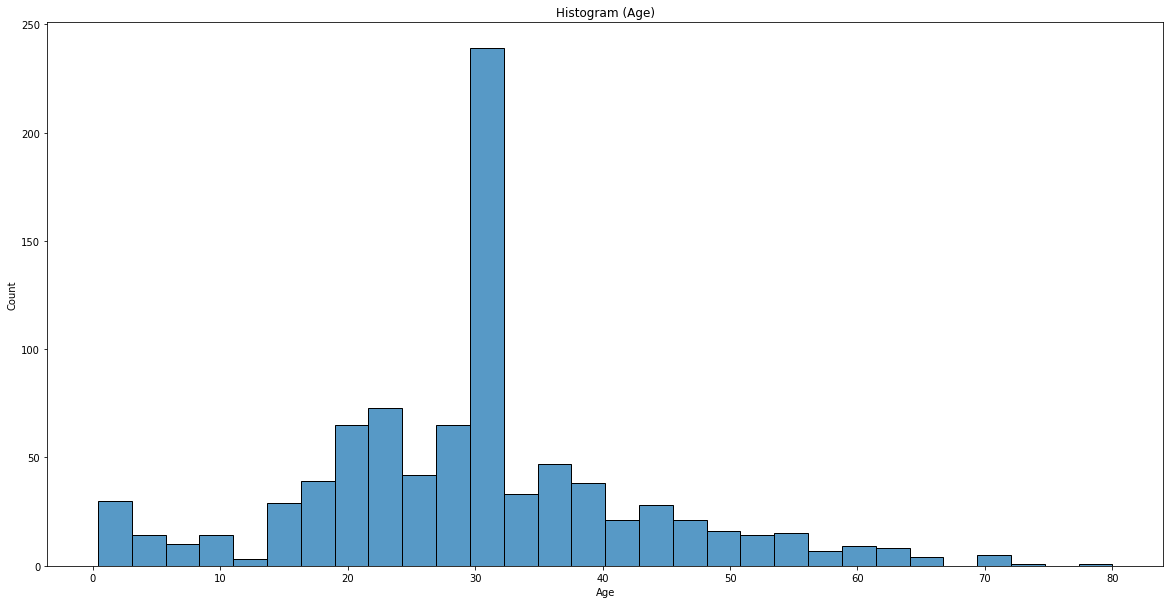

In [24]:
plt.figure(figsize = (20,10))
sns.histplot(x = "Age", data = train)
plt.title("Histogram (Age)")
plt.show()

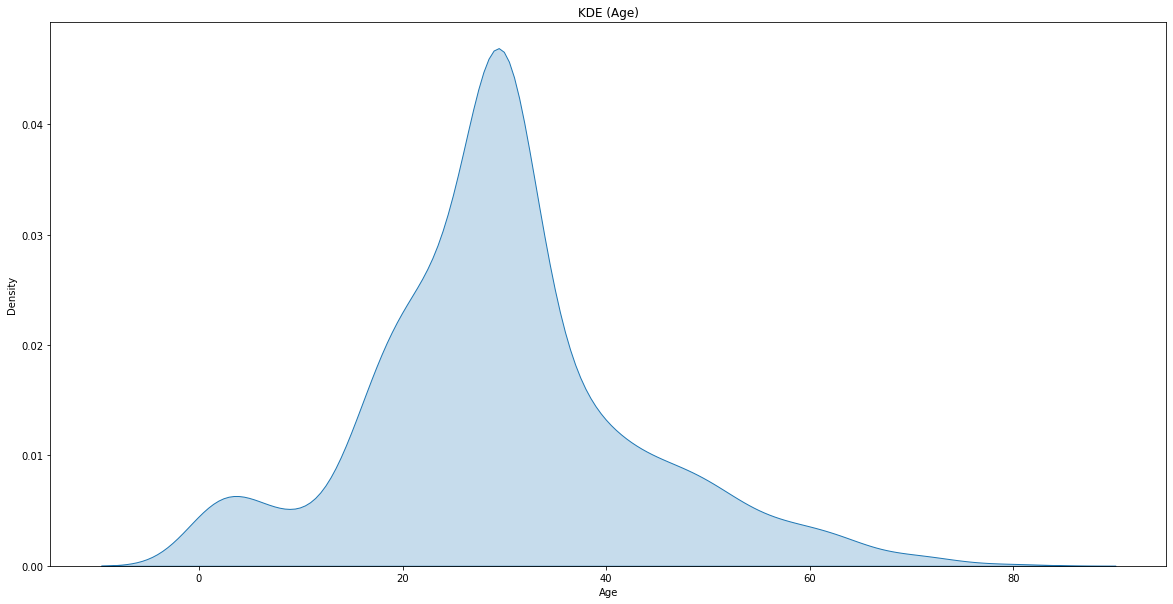

In [25]:
plt.figure(figsize = (20,10))
sns.kdeplot(x = "Age", data = train, fill = True)
plt.title("KDE (Age)")
plt.show()

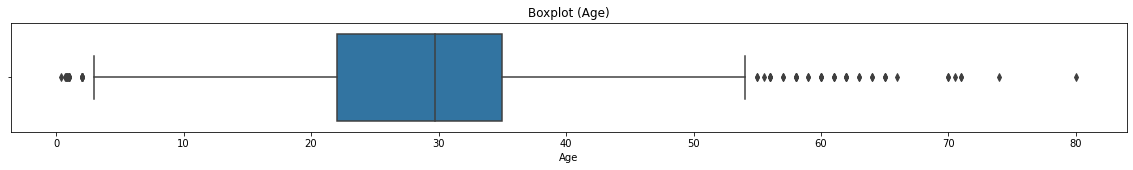

In [26]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "Age", data = train)
plt.title("Boxplot (Age)")
plt.show()

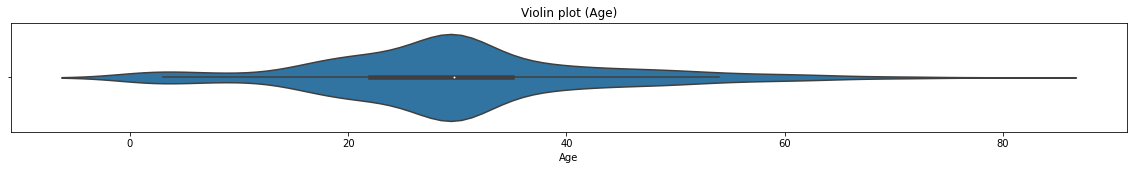

In [27]:
plt.figure(figsize = (20,2))
sns.violinplot(x = "Age", data = train)
plt.title("Violin plot (Age)")
plt.show()

<div class = "alert alert-warning">
</div>

**Distribution of fare**

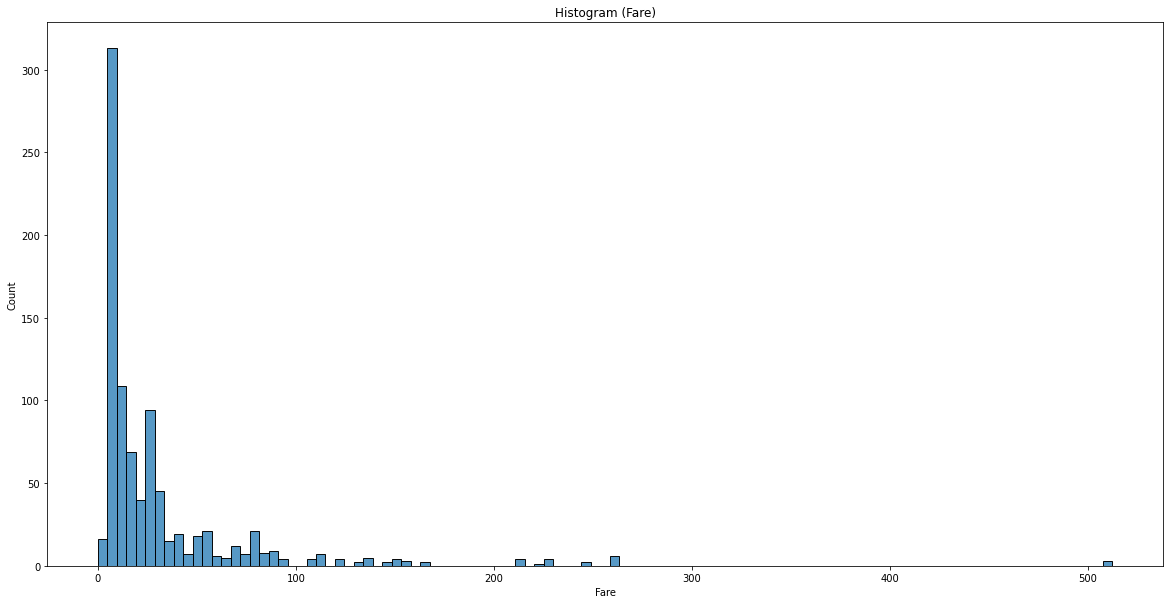

In [28]:
plt.figure(figsize = (20,10))
sns.histplot(x = "Fare", data = train)
plt.title("Histogram (Fare)")
plt.show()

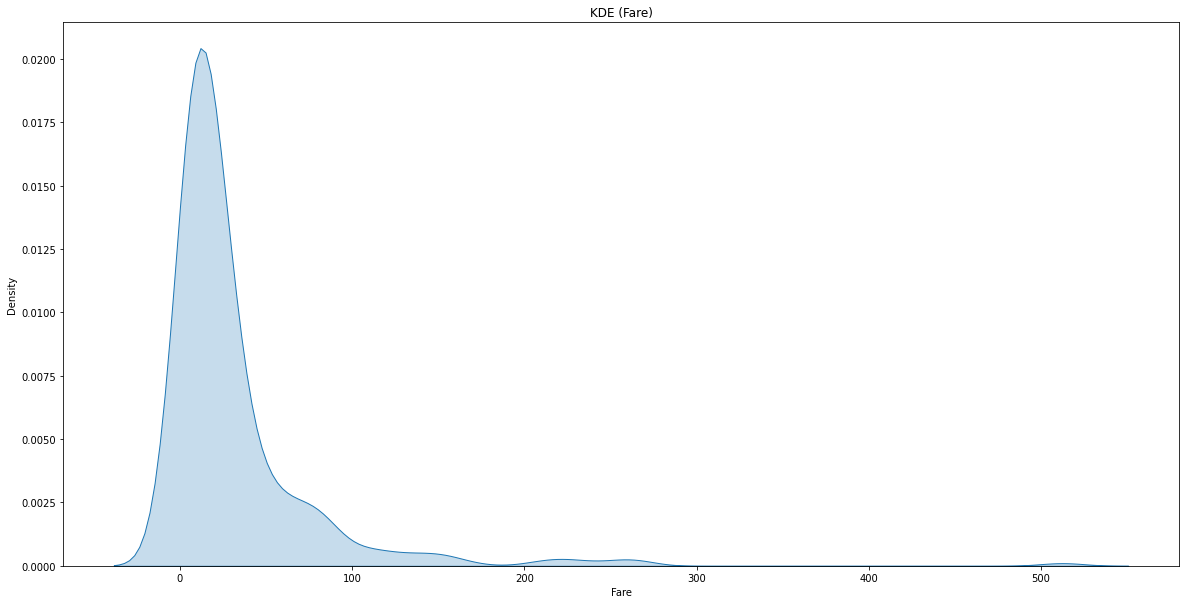

In [29]:
plt.figure(figsize = (20,10))
sns.kdeplot(x = "Fare", data = train, fill = True)
plt.title("KDE (Fare)")
plt.show()

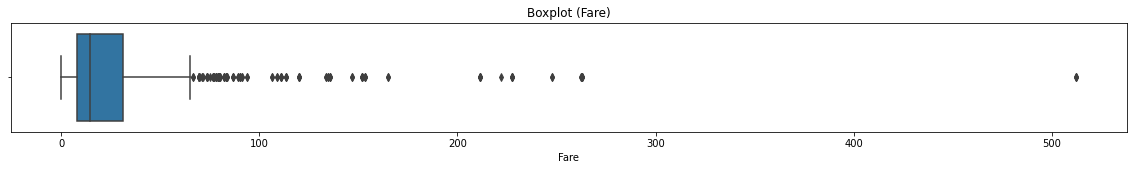

In [30]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "Fare", data = train)
plt.title("Boxplot (Fare)")
plt.show()

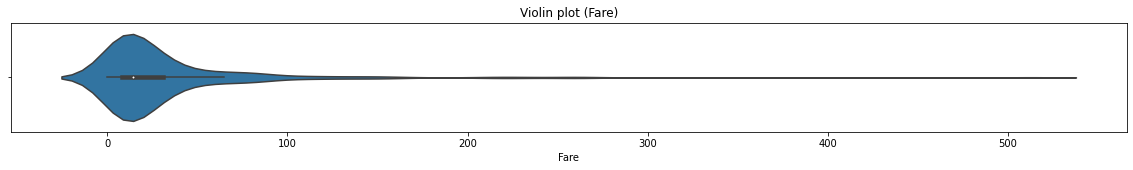

In [31]:
plt.figure(figsize = (20,2))
sns.violinplot(x = "Fare", data = train)
plt.title("Violin plot (Fare)")
plt.show()

<div class = "alert alert-warning">
</div>

**Distribution of gender**

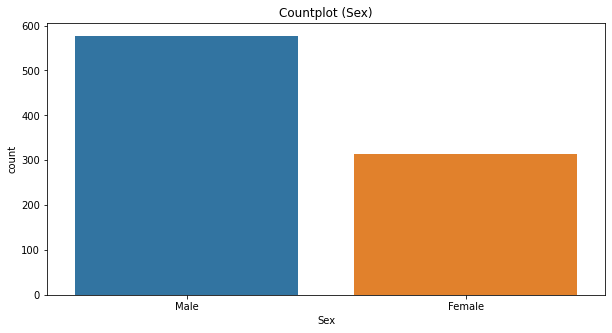

In [32]:
plt.figure(figsize = (10, 5))
sns.countplot(x = "Sex", data = train)
plt.title("Countplot (Sex)")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

<div class = "alert alert-warning">
</div>

**Relation of various features with Survived**

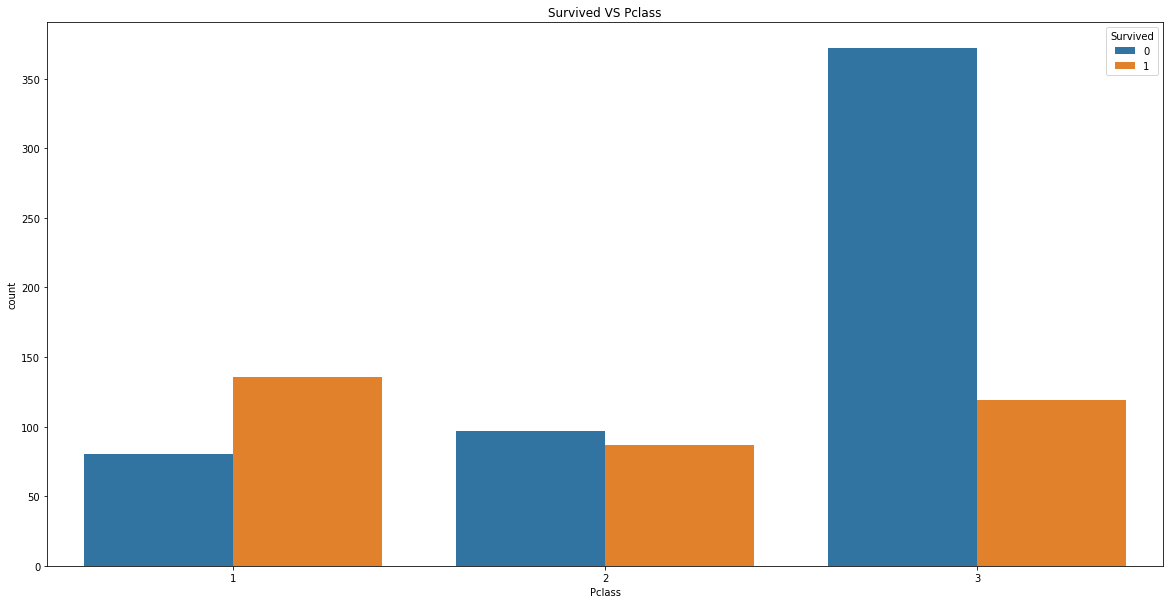

In [33]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Pclass", hue = "Survived", data = train)
plt.title("Survived VS Pclass")
plt.show()

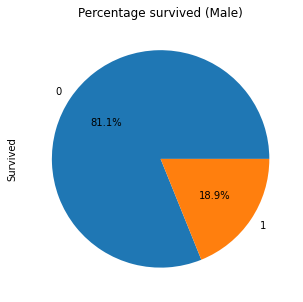

In [34]:
plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 0, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage survived (Male)")
plt.show()

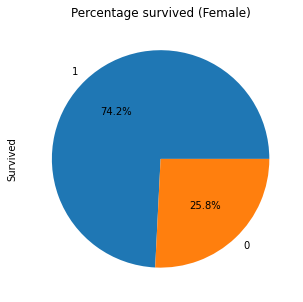

In [35]:
plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 1, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage survived (Female)")
plt.show()

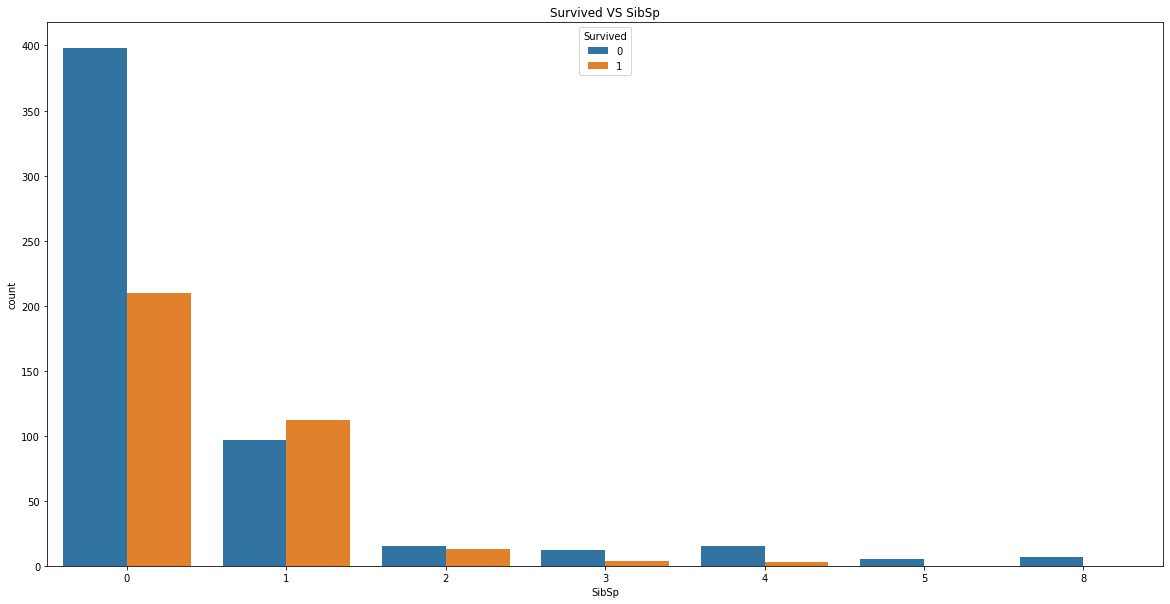

In [36]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "SibSp", hue = "Survived", data = train)
plt.title("Survived VS SibSp")
plt.show()

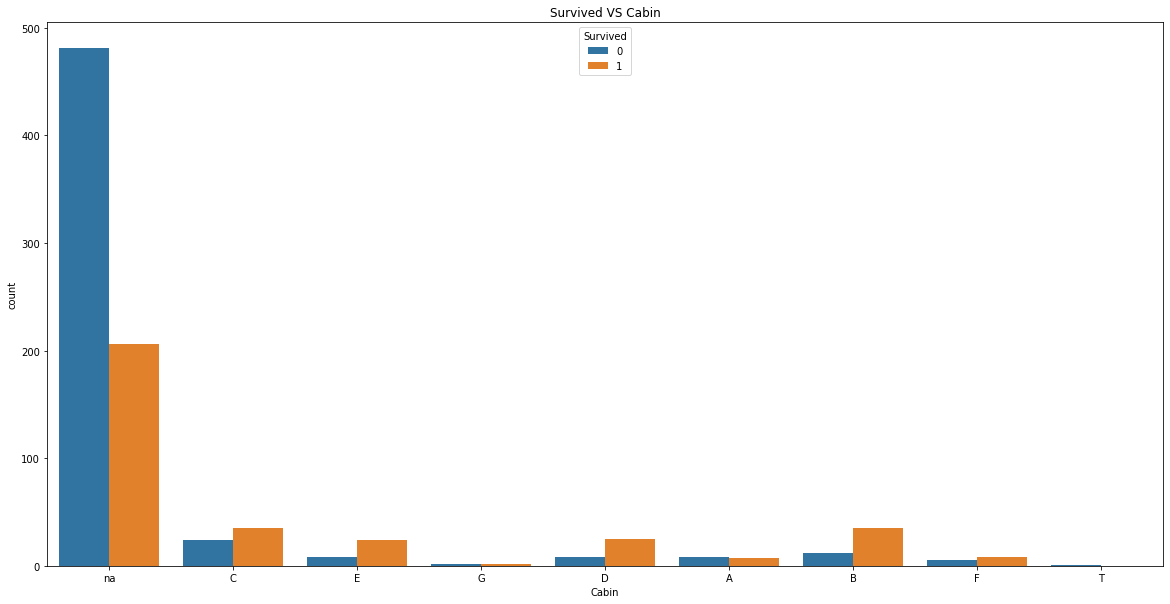

In [37]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Cabin", hue = "Survived", data = cabin_plot)
plt.title("Survived VS Cabin")
plt.show()

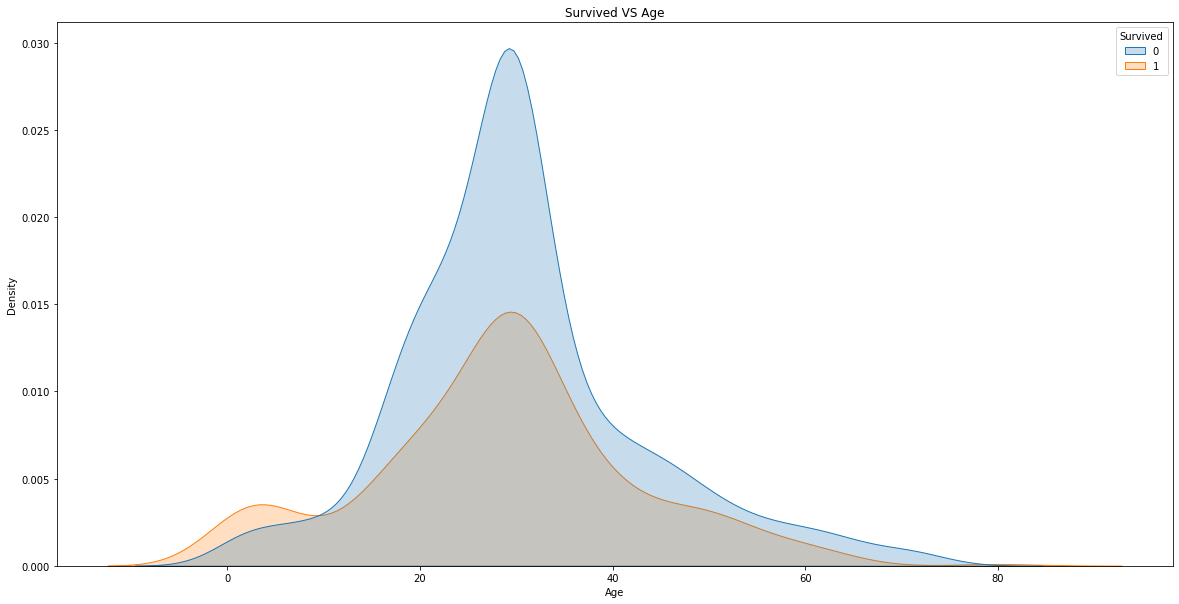

In [38]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = "Age", hue = "Survived", data = train, shade = True)
plt.title("Survived VS Age")
plt.show()

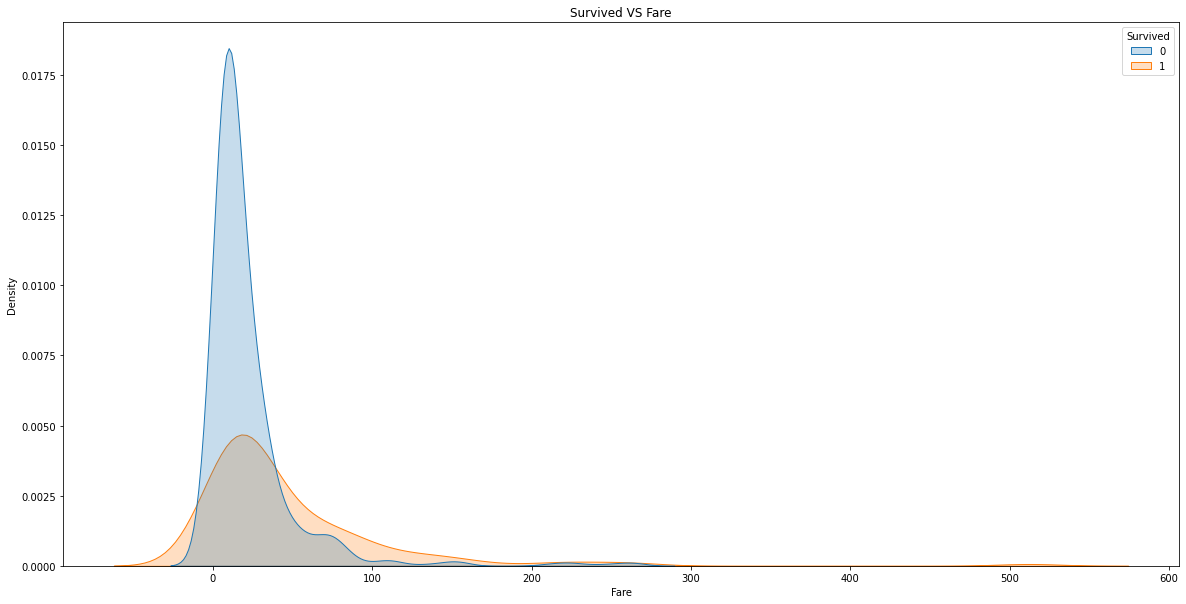

In [39]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = "Fare", hue = "Survived", data = train, shade = True)
plt.title("Survived VS Fare")
plt.show()

<div class = "alert alert-warning">
</div>

**Relation of various features with Age and Survived**

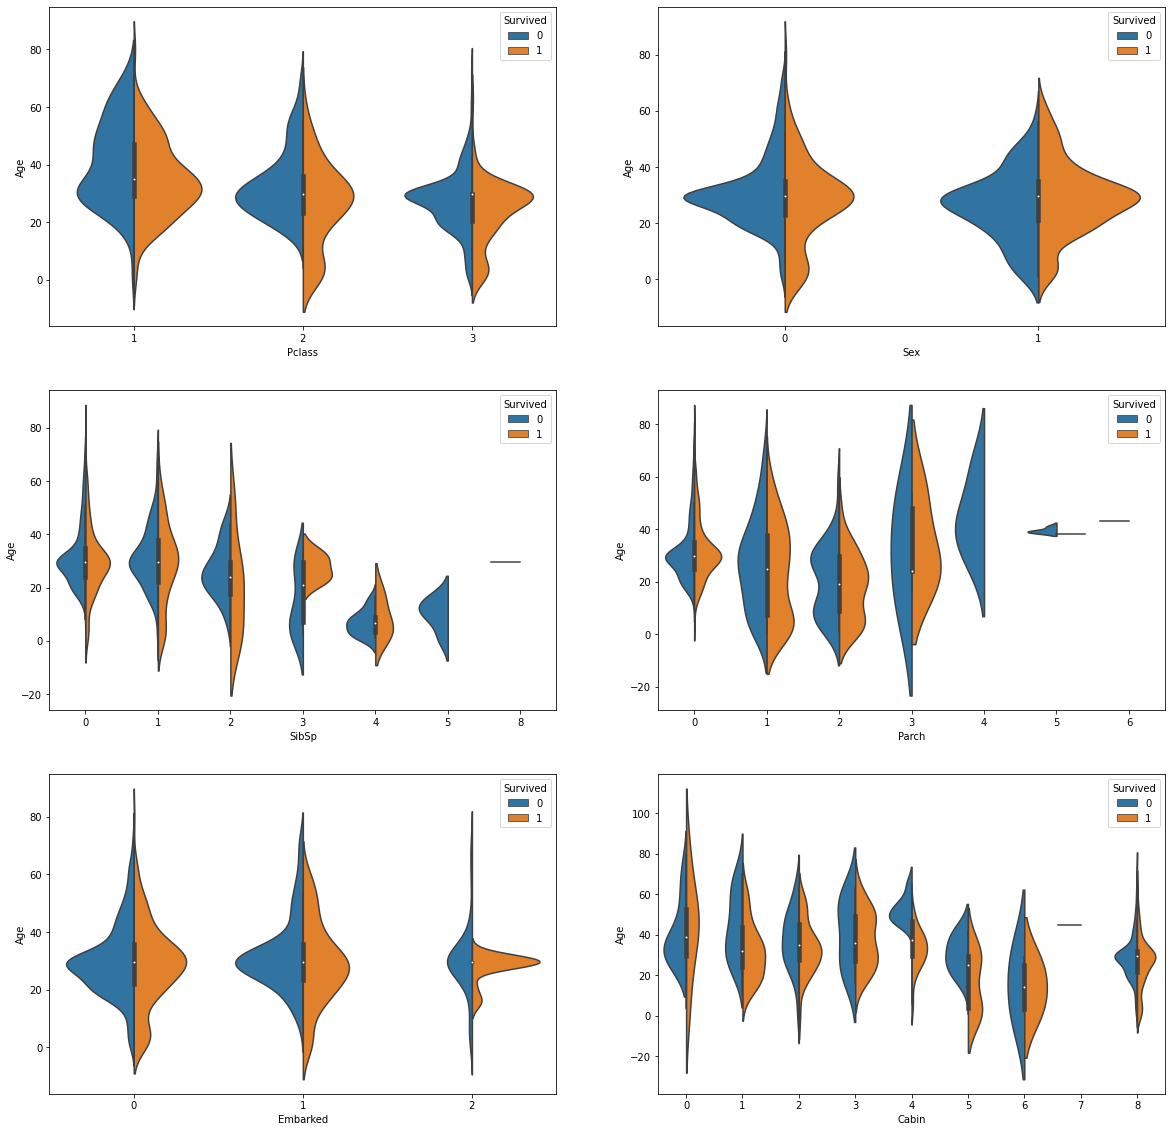

In [40]:
fig, axes = plt.subplots(3, 2, figsize = (20, 20))

sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", split = True, data = train, ax = axes[0, 0])
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", split = True, data = train, ax = axes[0, 1])
sns.violinplot(x = "SibSp", y = "Age", hue = "Survived", split = True, data = train, ax = axes[1, 0])
sns.violinplot(x = "Parch", y = "Age", hue = "Survived", split = True, data = train, ax = axes[1, 1])
sns.violinplot(x = "Embarked", y = "Age", hue = "Survived", split = True, data = train, ax = axes[2, 0])
sns.violinplot(x = "Cabin", y = "Age", hue = "Survived", split = True, data = train, ax = axes[2, 1])

plt.show()

<div class = "alert alert-warning">
</div>

<div class = "alert alert-success">
  <h3 style = "color:black;">Model creation and evaluation</h3>
</div>

There is a wide array of predictive modeling algorithms at our disposal. The algorithm(s) chosen is contingent on the problem itself and solution requirement. The problem posed here is a classification problem, in that the model must use the features provided to classify an unknown passenger as a survivior (1) or victim (0). Additionally, the category of machine learning seen here is supervised learning, since we have a labelled training dataset from which the model is created. Taking these points into consideration, we may decide on few algorithms to implement. The ones implemented here are:

1. Decision tree
2. Random forest
3. Naive Bayes
4. K-nearest neighbours
5. Support vector machine

In [41]:
y = train["Survived"]
X = train.drop("Survived", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

**Decision tree classifier**

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. There are generally two types of decision trees. Models where the target variable can take a finite set of values are called classification trees. Trees where the target variable can take continuous values (typically real numbers) are called regression trees.

![](https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png)

In [42]:
decision_tree_model = DecisionTreeClassifier(random_state = 2)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
decision_tree_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 74.86033519553072


**Random forest classifier**

The random forest classifier is an improvement over decision tree classifiers. Based on ensemble learning, a random forest classifier contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. In general, a greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

In [43]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
random_forest_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 79.3296089385475


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.2s finished


**Naive Bayes classifier**

The Naïve Bayes classifier is a probabilistic classifier that uses Bayes theorem. It assumes complete independance between the features. 
![](https://s3.ap-south-1.amazonaws.com/techleer/204.png)


In [44]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
NB_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", NB_model_acc)

Accuracy: 73.18435754189943


**K-nearest neighbours classifier**

The K-nearest neighbours (KNN) classifier uses proximity to make classifications or predictions about independent data points. This technique may be used for both classification and regression scenarios and the output will vary. In classification instances, a decision is made based on majority vote, i.e., the class assigned to the new data point is taken to be the one that is most frequently seen in the vicinity of the point. KNN is also known as a lazy learner technique since a model is not learned. Instead, the raw data is stored and used everytime a prediction must be made.
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", knn_model_acc)

Accuracy: 72.62569832402235


**Support vector machines**

Support vector machines (SVM) are a class of machine learning algorithms that map data to a high dimensionality feature space in such a manner that the data points can be categorized, even when they are not otherwise linearly seperable. A seperator between the categories is found and a hyperplane is drawn accordingly. Support vectors are those data points that are close to the hyperplane and influence the position and orientation of the hyperplane. The function used to map data to a high dimensionality feature space is called a kernel function.
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

In [46]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", svm_model_acc)

Accuracy: 65.92178770949721


<div class = "alert alert-success">
  <h3 style = "color:black;">Submission file</h3>
</div>

In [47]:
all_models = pd.DataFrame({
    "Model" : ["Decision tree classifier", "Random forest classifier", "Naive Bayes classifier", "KNN", "SVM"],
    "Accuracy score" : [decision_tree_model_acc, random_forest_model_acc, NB_model_acc, knn_model_acc, svm_model_acc]
})
all_models.sort_values(by = "Accuracy score")

,Model,Accuracy score
4,SVM,65.921788
3,KNN,72.625698
2,Naive Bayes classifier,73.184358
0,Decision tree classifier,74.860335
1,Random forest classifier,79.329609


After comparing the models above, it appears that the Random Forest classifier had the best performance with an accuracy score of approximately 79.33. Ergo, this is the model that will be used to create the final submission file. 

In [48]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X, y)
y_pred = random_forest_model.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.3s finished


In [49]:
submission = pd.DataFrame({
    "PassengerId" : test_passenger_ids,
    "Survived" : y_pred
})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [50]:
submission.to_csv('submission.csv', index = False)